In [57]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [51]:
conn = sqlite3.connect("Mta.db")
cur = conn.cursor()

## 1.	Number of trips in each route.

In [54]:
df1 = pd.read_sql_query("SELECT trips.route_id AS ROUTE_ID, route_long_name AS ROUTE_NAME,COUNT(service_id) AS [NUMBER OF TRIPS]  FROM routes INNER JOIN trips ON routes.route_id= trips.route_id GROUP BY trips.route_id, routes.route_long_name", conn)
df1

,ROUTE_ID,ROUTE_NAME,NUMBER OF TRIPS
0,10,Orange Route,328
1,12,Banner Route,164
2,13,Purple Route,284
3,21,Green Route,182


Text(0.5, 1.0, 'Number of trips in each route')

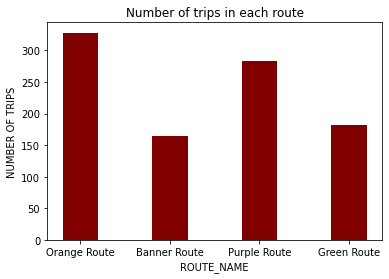

In [60]:
plt.bar(df1['ROUTE_NAME'], df1['NUMBER OF TRIPS'], color ='maroon',
        width = 0.4)
plt.xlabel("ROUTE_NAME")
plt.ylabel("NUMBER OF TRIPS")
plt.title("Number of trips in each route")

## 2. To find out the longest and shortest bus routes.

In [4]:
df2 = pd.read_sql_query("SELECT route_id, trips.trip_id AS Trip_Id, MIN(arrival_time) AS Start_Time ,MAX(arrival_time) AS End_Time FROM stop_times, trips WHERE stop_times.trip_id=trips.trip_id GROUP BY trips.trip_id, trips.route_id ORDER BY trip_id", conn)
df2

,route_id,Trip_Id,Start_Time,End_Time
0,13,8027,06:42:00,07:01:00
1,13,8028,07:12:00,08:13:00
2,13,8029,08:24:00,09:25:00
3,13,8030,09:36:00,10:37:00
4,13,8031,10:48:00,11:49:00
...,...,...,...,...
953,21,9918,16:50:00,17:43:00
954,21,9919,17:50:00,18:43:00
955,21,9921,19:45:00,20:10:00
956,21,9922,18:50:00,19:43:00


## 3. a)To analyse the busiest bus service route in Baltimore.

In [5]:
df3 = pd.read_sql_query("SELECT TOP 1 trips.route_id AS ROUTE_ID, route_long_name AS ROUTE_NAME,COUNT(service_id) AS [NUMBER oF TRIPS]	FROM routes INNER JOIN trips ON routes.route_id= trips.route_id GROUP BY trips.route_id, routes.route_long_name ORDER BY COUNT(service_id) DESC", conn).fetchone()[0]
df3

DatabaseError: Execution failed on sql 'SELECT TOP 1 trips.route_id AS ROUTE_ID, route_long_name AS ROUTE_NAME,COUNT(service_id) AS [NUMBER oF TRIPS]	FROM routes INNER JOIN trips ON routes.route_id= trips.route_id GROUP BY trips.route_id, routes.route_long_name ORDER BY COUNT(service_id) DESC': near "1": syntax error

In [6]:
busy_bus=cur.execute("SELECT trips.route_id AS ROUTE_ID, route_long_name AS ROUTE_NAME,COUNT(service_id) AS [NUMBER oF TRIPS]	FROM routes INNER JOIN trips ON routes.route_id= trips.route_id GROUP BY trips.route_id, routes.route_long_name ORDER BY COUNT(service_id) DESC").fetchall()[0]
busy_bus

(10, 'Orange Route', 328)

## 3. b) To find the less busy bus service route in Baltimore. 

In [7]:
df4 = pd.read_sql_query("SELECT TOP 1 trips.route_id AS ROUTE_ID, route_long_name AS ROUTE_NAME,COUNT(service_id) AS [NUMBER oF TRIPS]	FROM routes INNER JOIN trips ON routes.route_id= trips.route_id GROUP BY trips.route_id, routes.route_long_name ORDER BY COUNT(service_id)", conn).fetchone()[0]
df4

DatabaseError: Execution failed on sql 'SELECT TOP 1 trips.route_id AS ROUTE_ID, route_long_name AS ROUTE_NAME,COUNT(service_id) AS [NUMBER oF TRIPS]	FROM routes INNER JOIN trips ON routes.route_id= trips.route_id GROUP BY trips.route_id, routes.route_long_name ORDER BY COUNT(service_id)': near "1": syntax error

In [8]:
less_busy_bus=cur.execute("SELECT trips.route_id AS ROUTE_ID, route_long_name AS ROUTE_NAME,COUNT(service_id) AS [NUMBER oF TRIPS]	FROM routes INNER JOIN trips ON routes.route_id= trips.route_id GROUP BY trips.route_id, routes.route_long_name ORDER BY COUNT(service_id)").fetchall()[0]
less_busy_bus

(12, 'Banner Route', 164)

In [69]:
df4=df2.copy()
df4

,route_id,Trip_Id,Start_Time,End_Time
0,13,8027,06:42:00,07:01:00
1,13,8028,07:12:00,08:13:00
2,13,8029,08:24:00,09:25:00
3,13,8030,09:36:00,10:37:00
4,13,8031,10:48:00,11:49:00
...,...,...,...,...
953,21,9918,16:50:00,17:43:00
954,21,9919,17:50:00,18:43:00
955,21,9921,19:45:00,20:10:00
956,21,9922,18:50:00,19:43:00


In [63]:
df4['duration']=TIME(df4['End_Time'])-TIME(df4['Start_Time'])

NameError: name 'TIME' is not defined

In [11]:
df4['duration']= (datetime.strptime(df4['End_Time'], '%H:%M:%S'))-(datetime.strptime(df4['Start_Time'], '%H:%M:%S'))

TypeError: strptime() argument 1 must be str, not Series

In [12]:
from datetime import datetime

datetime_str = '13:55:26'

datetime_object = datetime.strptime(datetime_str, '%H:%M:%S').time()
print(datetime_object)

13:55:26


In [70]:
df4['time_start']=[datetime.strptime(x, '%H:%M:%S') lambda x in ]

SyntaxError: invalid syntax (2442863164.py, line 1)

In [74]:
df4['Start_Time'] = pd.to_datetime(df4['Start_Time'],errors = 'coerce')
df4.dtypes

route_id               int64
Trip_Id                int64
Start_Time    datetime64[ns]
End_Time      datetime64[ns]
dtype: object

In [75]:
df4['End_Time'] = pd.to_datetime(df4['End_Time'],errors = 'coerce')
df4.dtypes

route_id               int64
Trip_Id                int64
Start_Time    datetime64[ns]
End_Time      datetime64[ns]
dtype: object

In [76]:
df4['Duration']=df4['End_Time']-df4['Start_Time']
df4

,route_id,Trip_Id,Start_Time,End_Time,Duration
0,13,8027,2022-12-11 06:42:00,2022-12-11 07:01:00,0 days 00:19:00
1,13,8028,2022-12-11 07:12:00,2022-12-11 08:13:00,0 days 01:01:00
2,13,8029,2022-12-11 08:24:00,2022-12-11 09:25:00,0 days 01:01:00
3,13,8030,2022-12-11 09:36:00,2022-12-11 10:37:00,0 days 01:01:00
4,13,8031,2022-12-11 10:48:00,2022-12-11 11:49:00,0 days 01:01:00
...,...,...,...,...,...
953,21,9918,2022-12-11 16:50:00,2022-12-11 17:43:00,0 days 00:53:00
954,21,9919,2022-12-11 17:50:00,2022-12-11 18:43:00,0 days 00:53:00
955,21,9921,2022-12-11 19:45:00,2022-12-11 20:10:00,0 days 00:25:00
956,21,9922,2022-12-11 18:50:00,2022-12-11 19:43:00,0 days 00:53:00


In [77]:
df4['Duration']

0     0 days 00:19:00
1     0 days 01:01:00
2     0 days 01:01:00
3     0 days 01:01:00
4     0 days 01:01:00
            ...      
953   0 days 00:53:00
954   0 days 00:53:00
955   0 days 00:25:00
956   0 days 00:53:00
957   0 days 00:45:00
Name: Duration, Length: 958, dtype: timedelta64[ns]

Text(0.5, 1.0, 'Longest and shortest Bus Routes')

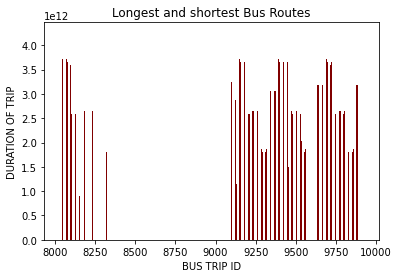

In [82]:
plt.bar(df4['Trip_Id'], df4['Duration'], color ='maroon',
        width = 0.4)
plt.xlabel("BUS TRIP ID")
plt.ylabel("DURATION OF TRIP")
plt.title("Longest and shortest Bus Routes")

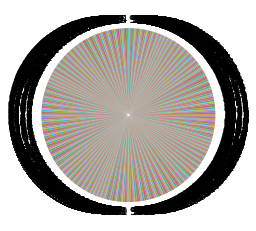

In [83]:
plt.pie(df4['Duration'], labels = df4['Trip_Id'])
plt.show()